## PHYS-253 

## Homework 2

Handed out: Friday, March 21, 2025

**Due: 4.59 pm; Monday, March 31, 2025**

<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Georgios Neofotistos, 2025. All rights reserved.

This work is the intellectual property of `Georgios Neofotistos`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>
</div>

## Instructions

a) You are allowed to discuss with your fellow students HOW to solve the problems. Collaboration is encouraged! But you need to hand in your INDIVIDUAL SOLUTION.  

d) List AI assistants (e.g., ChatGPT) that you worked with in arriving at a solution, or other software/tool; see detailed instructions in next cell. 

c) You can use code from previous lectures/labs - you don't neeed to reference this, it is part of the knowledge you acquired in this course.  However, if you use code from other sources, you MUST include a reference to the source.

d) Submit your Notebook (with solutions/answers) to Phys-253 site (area: ΕΡΓΑΣΙΕΣ / HW2).

### On the use of AI assistants (e.g., ChatGPT, or other Generative A.I. tools)

ChatGPT can be used as an on-line “office hours” resource to help with your learning. 
You can use ChatGPT-generated code (e.g. as inspiration if you are stuck or other reasons), however, submission of ChatGPT-generated
code without explanation or acknowledgment will earn you 0 credit. See cell below.

---

***NOTE: if it takes too much time to train your networks, try running them for a few epochs, but make sure that they run well (that is, without errors in setting up the model, compiling, and running it).***

__________________________________________________________________________________________________________________________

### Problem 1 (pretraining problem)


a. Build a dense neural net (DNN) with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.

b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4 [*this will be useful for the next problem as you will use transfer learning for digits 5 to 0 in that problem*]. You will need a softmax output layer with five neurons.

c. Try adding Batch Normalization and compare the learning curves. Is it converging faster than before? Does it produce a better model?

d. Try adding dropout to every layer and try again. Does it produce a better model?

Final Epochs for BASE MODEL: 12
Final Epochs for BATCHNORM MODEL: 12
Final Epochs for BASE MODEL: 12


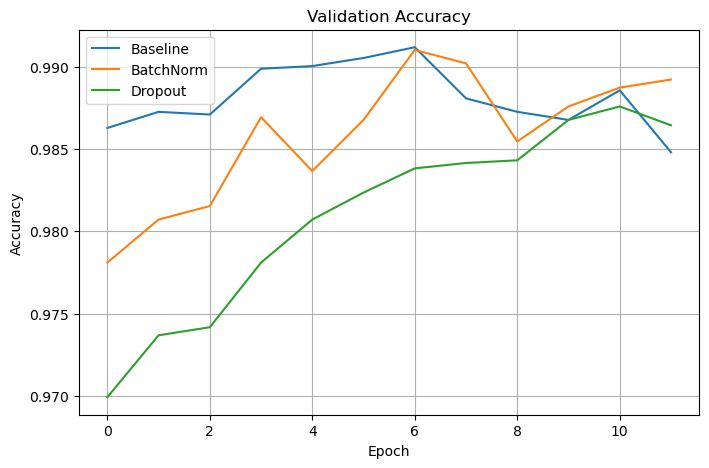

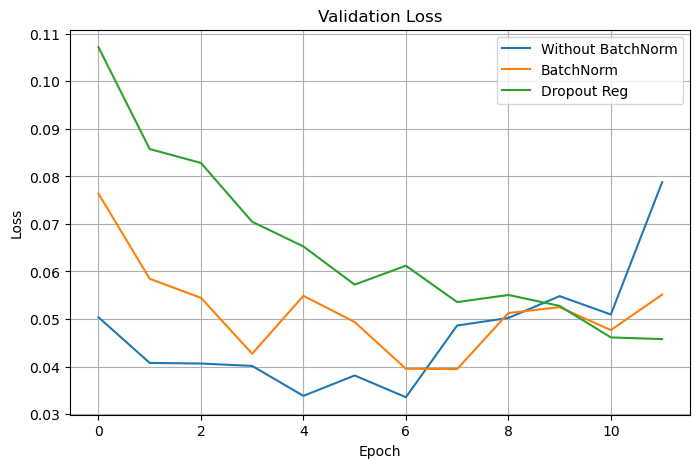

In [41]:

import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
import matplotlib.pyplot as plt
import random
import tensorflow as tf


seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
trainLess5 = y_train < 5
testLess5 = y_test < 5
x_train, y_train = x_train[trainLess5], y_train[trainLess5]
x_test, y_test = x_test[testLess5], y_test[testLess5]
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

activation = 'elu'
kernel_initializer = 'he_normal'
batch_size = 64
epochs = 500
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

def build_base_model():
    # creating an input layer of size 784 (flatten 28x28 image)
    input_ = Input(shape=(784,))

    x = input_  # beginning of layers "chain". In every step, 
                # the x takes the output of the previous layer 

    # adding 5 dense hidden layers (connected)
    for hidden_layer in range(5):
        # 100 neurons for each layer
        x = Dense(100, activation=activation, kernel_initializer=kernel_initializer)(x)
    
    # output layer with 5 neurons (softmax for classification in 5 classes)
    output = Dense(5, activation='softmax')(x)

    # defining the final model from input to --> output
    model = Model(inputs=input_, outputs=output)

    # return the model that was created
    return model

model_base = build_base_model()
model_base.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_base = model_base.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=0
)

final_epochs1 = len(history_base.history['loss'])
print(f'Final Epochs for BASE MODEL: {final_epochs1}')


def build_batchnorm_model():
    input_ = Input(shape=(784,))
    x = input_
    for _ in range(5):
        x = Dense(100, kernel_initializer=kernel_initializer)(x)
        x = BatchNormalization()(x)
        x = Activation(activation)(x)
    output = Dense(5, activation='softmax')(x)
    model = Model(inputs=input_, outputs=output)
    return model

model_bn = build_batchnorm_model()
model_bn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_bn = model_bn.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=final_epochs,
    batch_size=batch_size,
    verbose=0
)

final_epochs2 = len(history_bn.history['loss'])
print(f'Final Epochs for BATCHNORM MODEL: {final_epochs2}')


def build_dropout_model():
    input_ = Input(shape=(784,))
    x = input_
    for _ in range(5):
        x = Dense(100, activation=activation, kernel_initializer=kernel_initializer)(x)
        x = Dropout(0.3)(x)
    output = Dense(5, activation='softmax')(x)
    model = Model(inputs=input_, outputs=output)
    return model

model_dropout = build_dropout_model()
model_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_dropout = model_dropout.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=final_epochs,
    batch_size=batch_size,
    verbose=0
)
final_epochs3 = len(history_dropout.history['loss'])
print(f'Final Epochs for BASE MODEL: {final_epochs3}')


plt.figure(figsize=(8, 5))
plt.plot(history_base.history['val_accuracy'], label='Baseline')
plt.plot(history_bn.history['val_accuracy'], label='BatchNorm')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_base.history['val_loss'], label='Without BatchNorm')
plt.plot(history_bn.history['val_loss'], label='BatchNorm')
plt.plot(history_dropout.history['val_loss'], label='Dropout Reg')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



Παρατηρούμε ότι όλα τα μοντέλα συγκλίνουν όσο προχωράει η εκπαίδευση. Το BatchNorm μοντέλο έχει πιο σταθερή και ομαλή αύξηση της ακρίβειας σε σχέση με τα άλλα, και στο τέλος καταλήγει να έχει τη μεγαλύτερη ακρίβεια.

Παρατηρούμε επίσης από το δεύτερο διάγραμμα ότι το BatchNorm μοντέλο έχει το πιο σταθερό loss και άρα μπορούμε ενδεχομένως να θεωρήρουμε ότι δεν έχει τάση για overfitting, σε σχέση με τα άλλα δύο μοντέλα.

__________________________________________________________________________________________________________________________

### Problem 2 (transfer learning problem)

a. Create a new DNN that reuses all the pretrained hidden layers of the previous model (problem 1 of HW2), freezes them (try freezing all the reused layers for a few epochs, according to the "pretrained layers" example covered in Lecture 5 - this material is presented in pages 373-376 of A. Geron's book ["Reusing Pretrained Layers" and "Transfer Learning with Keras" sections]), and replaces the softmax output layer with a new one. 

b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision? 

c. Try reusing just four hidden layers instead of five. Can you achieve a higher precision?

d. Now unfreeze the top two hidden layers and continue training. Can you get the model to perform even better?

In [42]:
from tensorflow import keras
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Input, Dense # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
import numpy as np
import time

In [62]:
#a
def transfer_model():
    # base model from the previous exercise
    base_model = build_base_model()

    # take the output from the last HIDDEN layer! (not softmax)
    hidden_output = base_model.layers[-2].output

    # add the new output layer with 5 classes 
    new_output = keras.layers.Dense(5, activation="softmax")(hidden_output)

    # creation of the new model that keeps the initial input and has a new output
    transfer_model = keras.models.Model(inputs=base_model.input, outputs=new_output)

    for layer in base_model.layers[:-1]:
        layer.trainable = False # freezing all the layers of the initial 
                                # model except the last one

    return transfer_model
    

#b  - 5 to 9 digits, 100 images per digit
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
# from 28x28 images to 1D (784) arrays, 255 for normalization
X_train_full = X_train_full.reshape(-1, 784) / 255.0

# note: when I use .reshape(-1,x), -1="cacluclate how many pictures exist, I
# just need each one to have 784 elements"

X_test = X_test.reshape(-1, 784) / 255.0

trainMore5 = (y_train_full >= 5)
testMore5 = (y_test >= 5)
X_train59 = X_train_full[trainMore5]
y_train59 = y_train_full[trainMore5] - 5
X_test59 = X_test[testMore5]
y_test59 = y_test[testMore5] - 5


X_small = []
y_small = []
digits = [0, 1, 2, 3, 4]

for digit in digits:
    count = 0
    for i in range(len(y_train59)): # looking at the training set labels
        if y_train59[i] == digit: # if the label is one of the digits we want
            X_small.append(X_train59[i])
            y_small.append(y_train59[i])
            count += 1
        if count == 100: # the above will be done as many times needed to find
                         # 100 images
            break 

X_small = np.array(X_small) # keras fit needs arrays 
y_small = np.array(y_small)

shuffle = np.random.permutation(len(X_small))
X_train_small = X_small[shuffle] # to avoid order bias
y_train_small = y_small[shuffle]

model = transfer_model()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time.time()
model.fit(X_train_small, y_train_small, epochs=30, validation_split=0.2)
end = time.time()
print(f"Training time: {end - start:.2f} seconds")

test_loss, test_acc = model.evaluate(X_test59, y_test59)
print(f"Test accuracy: {test_acc*100: .2f}%")


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2528 - loss: 1.6539 - val_accuracy: 0.3600 - val_loss: 1.4550
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3825 - loss: 1.4396 - val_accuracy: 0.5300 - val_loss: 1.3170
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4523 - loss: 1.3063 - val_accuracy: 0.5700 - val_loss: 1.2154
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5144 - loss: 1.2105 - val_accuracy: 0.6100 - val_loss: 1.1318
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5688 - loss: 1.1344 - val_accuracy: 0.6100 - val_loss: 1.0607
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6071 - loss: 1.0712 - val_accuracy: 0.6200 - val_loss: 1.0006
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6427 - loss: 1.0180 - val_accuracy: 0.6600 - val_loss: 0.9497
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6677 - loss: 0.9724 - val_accuracy: 0.6700 - val_loss

In [61]:
# το accuracy μου ειναι αρκετα χαμηλο και υποθετω οτι αυτο οφειλεται
# κατα κυριο λογο στο μικρο dataset, στο οτι δεν εκανα fine tuning των layers 
# και στο οτι με βαση τις πρωτες 5 κλασεις το μοντελο δεν μπορει ευκολα να 
# γενικευσει για τις αλλες 5 που δεν εχει δει

# Σημειωση: Για μεγαλυτερα epochs βλεπω αρκετη βελτιωση του accuracy, όταν
# ειχα βαλει περιπου 10 υποθετω οτι το μοντελο λογω των λιγων data δεν προλαβαινε
# να τα μαθει αρκετα για να κανει καλη γενικευση σε αυτα

# Στα 30 epochs εχω περιπου 72% accuracy. Μπορω να πετύχω και υψηλοτερο (περίπου
# 75%) για 60 epochs αλλα υπαρχει κινδυνος για overfitting

__________________________________________________________________________________________________________________________

In [64]:
#c - 4 hidden layers
def transfer_model_4layers():
    base_model = build_base_model()
    
    hidden_output = base_model.layers[5].output # output of 4th hidden layer
    new_output = keras.layers.Dense(5, activation="softmax")(hidden_output)
    model = keras.models.Model(inputs=base_model.input, outputs=new_output)

    for layer in base_model.layers[1:6]:  
        layer.trainable = False

    return model

model = transfer_model_4layers()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time.time()
history = model.fit(X_train_small, y_train_small, epochs=30, validation_split=0.2)
end = time.time()

print(f"Training time: {end - start:.2f} seconds")

final_train_acc = history.history["accuracy"][-1]
print(f"Final training accuracy: {final_train_acc * 100:.2f}%")

test_loss, test_acc = model.evaluate(X_test59, y_test59)
print(f"Test accuracy:  {test_acc * 100:.2f}%")

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2204 - loss: 1.9278 - val_accuracy: 0.1900 - val_loss: 1.7907
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2543 - loss: 1.6928 - val_accuracy: 0.2100 - val_loss: 1.6153
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3528 - loss: 1.5311 - val_accuracy: 0.3100 - val_loss: 1.4858
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4393 - loss: 1.4165 - val_accuracy: 0.4100 - val_loss: 1.3826
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4728 - loss: 1.3277 - val_accuracy: 0.4900 - val_loss: 1.2941
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5386 - loss: 1.2529 - val_accuracy: 0.5300 - val_loss: 1.2170
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5751 - loss: 1.1884 - val_accuracy: 0.5600 - val_loss: 1.1507
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6162 - loss: 1.1327 - val_accuracy: 0.6500 - val_loss

In [68]:
#d
model.layers[4].trainable = True # unfreeze last 2 hidden layers (4,5)
model.layers[5].trainable = True # aka fine-tuning for NN
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=["accuracy"])
start = time.time()
history_finetune = model.fit(X_train_small, y_train_small, epochs=30, validation_split=0.2)
end = time.time()

final_train_acc = history_finetune.history["accuracy"][-1]
print(f"Training accuracy after fine-tuning: {final_train_acc * 100:.2f}%")

test_loss, test_acc = model.evaluate(X_test59, y_test59)
print(f"Test accuracy after fine-tuning: {test_acc * 100:.2f}%")

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8212 - loss: 0.6029 - val_accuracy: 0.8200 - val_loss: 0.6027
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.6003 - val_accuracy: 0.8200 - val_loss: 0.6011
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.5985 - val_accuracy: 0.8200 - val_loss: 0.5996
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8230 - loss: 0.5968 - val_accuracy: 0.8200 - val_loss: 0.5981
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.5951 - val_accuracy: 0.8200 - val_loss: 0.5967
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.5935 - val_accuracy: 0.8200 - val_loss: 0.5952
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.5918 - val_accuracy: 0.8200 - val_loss: 0.5938
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.5902 - val_accuracy: 0.8200 - val_loss

In [69]:
# παρατηρω οτι δεν αλλαζει κατι αν αυξησω αλλο τα epochs εδω
# πιθανοτατα θα επαιρνα καλυτερο accuracy αν ξεπαγωνα παραπανω layers
# ωστε να μπορεσει το μοντελο μου να μπορει να γενικευσει καλυτερα

### Problem 3

- Part a) What are the advantages of a CNN over a fully connected DNN for image classification?

- Part b) Make a sketch (by hand, on a piece of paper) to show (explain) your answer(s) to Part a)

PART A

Advantages of CNN over a fully connected DNN for image classification:

1) Sparse Connectivity 
Not every node is connected with every other node (connections sparsity). In CNN we have filters that we move around the image and at a time we are talking about only a local region, so we are not affecting the whole image.

2) Location Invariance
The combination of convolution and pooling operation gives a location invariant feature detection 

3) Parameter sharing
The network can learn the parameters for a filter and can then apply them in the entire image

Why pooling helps:
1) Reduces Dimensionality & Computation:
Pooling downscales the feature maps, leading to faster training and less memory usage.

2) Reduces Overfitting:
By reducing the size of the representations, the model is less likely to memorize the training data.

3) Increases Robustness:
Pooling makes the model more tolerant to small shifts, rotations, or noise in the input image.

source: this great Youtube video "Simple explanation of convolutional neural network | Deep Learning Tutorial 23 (Tensorflow & Python)", https://www.youtube.com/watch?v=zfiSAzpy9NM&ab_channel=codebasics

____________________________________________________________________________________________________________________________

### Problem 4:



In Lecture 6, we discussed a CNN (on MNIST) that uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. [Do not forget to flatten the output of the MaxPool2D layer before stacking the dense layers]. 

Try to beat the level of accuracy (on the test set, the validation set, the train set) achieved in Lecture 6 CNN by adding (or removing) layers, and changing the parameters.

***NOTE: if it takes too much time to train your CNNs, try running just one of them (for few epochs), but present the "candidate" CNNs you plan to train (without actually train them).***

In [47]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)


#training on 1719 samples

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.8793 - loss: 0.3848 - val_accuracy: 0.9864 - val_loss: 0.0515
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9725 - loss: 0.0878 - val_accuracy: 0.9888 - val_loss: 0.0465
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9807 - loss: 0.0630 - val_accuracy: 0.9898 - val_loss: 0.0354
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.9847 - loss: 0.0503 - val_accuracy: 0.9890 - val_loss: 0.0407
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9920 - val_loss: 0.0375
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9922 - val_loss: 0.0314
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9908 - loss: 0.0297 - val_accuracy: 0.9930 - val_loss: 0.0322
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9909 -

[0.032514821738004684, 0.9915000200271606]

__________________________________________________________________________________________________________________________